In [2]:
import pandas as pd
import quandl
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

# Variables
Below, I'm setting up data frames to hold: 
 
1) Nominal rate of unemployment -Thousands of Persons Seasonally Adjusted, Persons 16 years of age and older.

2) GDP - Gross Domestic Product in billions of $USD (Fed's calculation method: http://www.bea.gov/national/pdf/nipaguid.pdf)

3) New Privately Owned Housing Units Started (Thousands of Units Seasonally Adjusted Annual Rate) - the number of new housing units that began construction

In [3]:
df1 = quandl.get("FRED/UNEMPLOY", authtoken="####") # nominal rate of unemployment
df2 = quandl.get("FRED/GDP", authtoken="####") # GDP
df3 = quandl.get("FRED/HOUST", authtoken="####") # New Privately Owned Housing Units Started

# Selection 
I sliced the data to show the full extent of the recession from 06 - 13, though it technically ended in 2009.

I then joined the slices to (hopefully) show that they were somewhat correlated. The data has an index and a single attribute labelled 'value'

In [18]:
U = df1.loc['2006-1-1':'2013-12-31']
G = df2.loc['2006-1-1':'2013-12-31']
H = df3.loc['2006-1-1':'2013-12-31']

# A sample of what our data looks like 
print(U.tail(5))

              Value
Date               
2013-08-01  11279.0
2013-09-01  11270.0
2013-10-01  11136.0
2013-11-01  10787.0
2013-12-01  10404.0


In [5]:
joined_data1 = pd.merge(pd.merge(U, G, left_index=True, 
                right_index=True), H, left_index=True, right_index=True)

joined_data1.columns = ['Unemployment', 'GDP', 'New Housing']

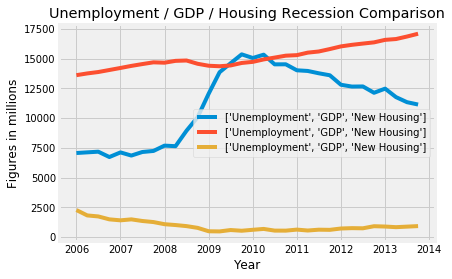

In [6]:
plt.plot(joined_data1, label=['Unemployment', 'GDP', 'New Housing'])

plt.xlabel('Year')
plt.ylabel('Figures in millions')

plt.title('Unemployment / GDP / Housing Recession Comparison')

plt.legend()

plt.show()

# Afterwards...

As I found out a few months later when revisiting this project, using a merge/join was unnecessarily complicated for the sake of visualization and could be accomplished by just plotting the individual slices instead.

Additionally, it seemed basically impossible to correctly label the lines on the merged version above, but was simple below.

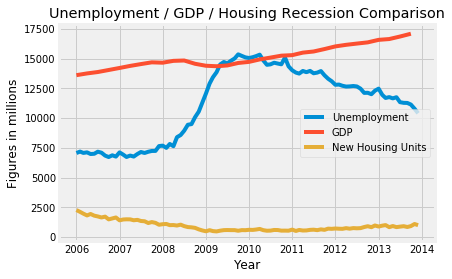

In [7]:
plt.plot(U, label='Unemployment')
plt.plot(G, label='GDP')
plt.plot(H, label='New Housing Units')

plt.xlabel('Year')
plt.ylabel('Figures in millions')

plt.title('Unemployment / GDP / Housing Recession Comparison')

plt.legend()


plt.show()

# Exploratory Stats 
Now, let's try to get deeper into the numbers. Just from basic descriptive stats using .describe() below, I have a few thoughts: 

- Unemployment:
    - this has a fairly large standard deviation; this is because of the jump we see on the chart from '08 to mid-'09, which was the dead center of the recession. It almost looks exponential; in fact, recessions often cause a domino effect like the one observed here. People lose their jobs due to a decline in the economy --> consumer spending drops --> business sales drop across all segments --> the businesses lay off more workers. This risk, obviously, is that this can snowball and be very difficult to stop. The Federal Reserve's response to this (in a very broad sense) was quantitative easing, which happened after the recession (https://www.stlouisfed.org/publications/regional-economist/third-quarter-2017/quantitative-easing-how-well-does-this-tool-work)
    - this also has a large range (max - min), which might go hand in hand with a large st. dev. in many cases, but just using basic stats, we can see that unemployment doubled (!) in barely two years. 
  
  
- GDP: 
     - Probably as expected, this is quite a bit more stable than unemployment; while it clearly fluctuated during the recession, and was still considered a major decrease, because of the sheer size of the U.S. economy it has a much smaller range relative to unemployment. 
     
     
- New Housing Units: 
    - Admittedly, the factor I know least about, but we'll give it a shot. First, the standard deviation is quite large, indicating some fluctuation. Looking at the curve, it declined basically the entire recession and then stayed at a very low number. The range is huge, 2273 - 478 = 1795, which is a range of 4.2 standard deviations. 


In [15]:
print(U.describe())
print(G.describe())
print(H.describe())

              Value
count     96.000000
mean   11226.197917
std     3048.711899
min     6727.000000
25%     7602.000000
50%    12031.500000
75%    13878.250000
max    15352.000000
              Value
count     32.000000
mean   15118.092125
std      957.139795
min    13603.933000
25%    14413.870750
50%    14820.399000
75%    15852.284500
max    17083.137000
             Value
count    96.000000
mean    939.635417
std     427.163968
min     478.000000
25%     597.750000
50%     826.500000
75%    1100.750000
max    2273.000000


# Summary 

Last, I've calculated correlations between these three dataframes. Some interesting things to note: 

1. Unemployment is moderately correlated with GDP; this makes sense, though honestly I might have thought that it would be higher than 0.44
2. New Housing has approximately the same correlation with GDp that unemployment does with GDP
3. Most interestingly, unemployment and new housing units are very strongly correlated. This would have been a pretty easy guess to make, though it strengthens the idea behind a snowball effect from rising unemployment. People get laid off --> they don't buy houses --> construction companies have to lay off employees --> the people that have been laid off don't buy cars, etc. etc. 

If we had to make an educated guess based on the data so far, we could say that during a recession, as unemployment rises, people are less likely to buy houses across the board. 

In [24]:
print(U.corrwith(G, axis=0))
print(U.corrwith(H, axis=0))
print(H.corrwith(G, axis=0))

Value    0.441588
dtype: float64
Value   -0.8695
dtype: float64
Value   -0.481518
dtype: float64


In [11]:
def my_func(x): 
    return x + 10
    print("I don't know why I'm adding this, just some git practice")
        

In [13]:
my_func(10)

20